Objective :Goal is to build a mulitple linear regression model for prediction of shared bikes

# Data Preparation

##Import libraries required for the processing and visualization

In [180]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Import statdsmodel and sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

Import the provided CSV file with the assignment.

In [183]:
bike_data_input = pd.read_csv('day.csv')
bike_data_input.shape

(730, 16)

In [184]:
bike_data_input.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
bike_data_input.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [186]:
bike_data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [187]:
bike_data_input.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [188]:
bike_data_input.drop_duplicates(inplace=True)
bike_data_input.shape

(730, 16)

##Removing the insignificant columns to make data look more promising for the analysis.We are using a new varibale so that we can use old data for comparison if required.
1. Since target varibale in 'cnt', we dont need the 'casual' and 'registered'. Basically , 'cnt' is sum of 'registered' and 'casual'.
2. instant is just for indexing and doesnt have any value.
3. We already have the data for year and month and we dont have any specific dependencies with teh date.

In [218]:
bike_data_Modified=bike_data_input.drop(['casual','registered','instant','dteday'],axis=1)


In [219]:
bike_data_Modified.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Using data disctionary lets map the value and see the data for better undertanding. We are going to use the data dictionary provided in the Assignment section.

In [220]:
#Season
bike_data_Modified.season = bike_data_Modified.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
#Month
bike_data_Modified.mnth = bike_data_Modified.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#WeekDay
bike_data_Modified.weekday = bike_data_Modified.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
#Weather Situation
bike_data_Modified.weathersit = bike_data_Modified.weathersit.map({1:'Clear',2:'Mist',3:'Light_RainSnow',4:'Heavy_RainSnow'})

In [221]:
bike_data_Modified.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

Since we already encoded the values from data dictionary. Let's apply it on the Modified dataset and try to understand it

Now Lets create a plt function to view the data wrt important variables. Note:- We are putting both the year [2018 & 2019] for better side by side comparison approach!

In [222]:
def plot_impVariable_bike_data(column):
    plt.figure(figsize = (16,8))
    sns.barplot(x=column,y='cnt',data=bike_data_Modified, hue='yr',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

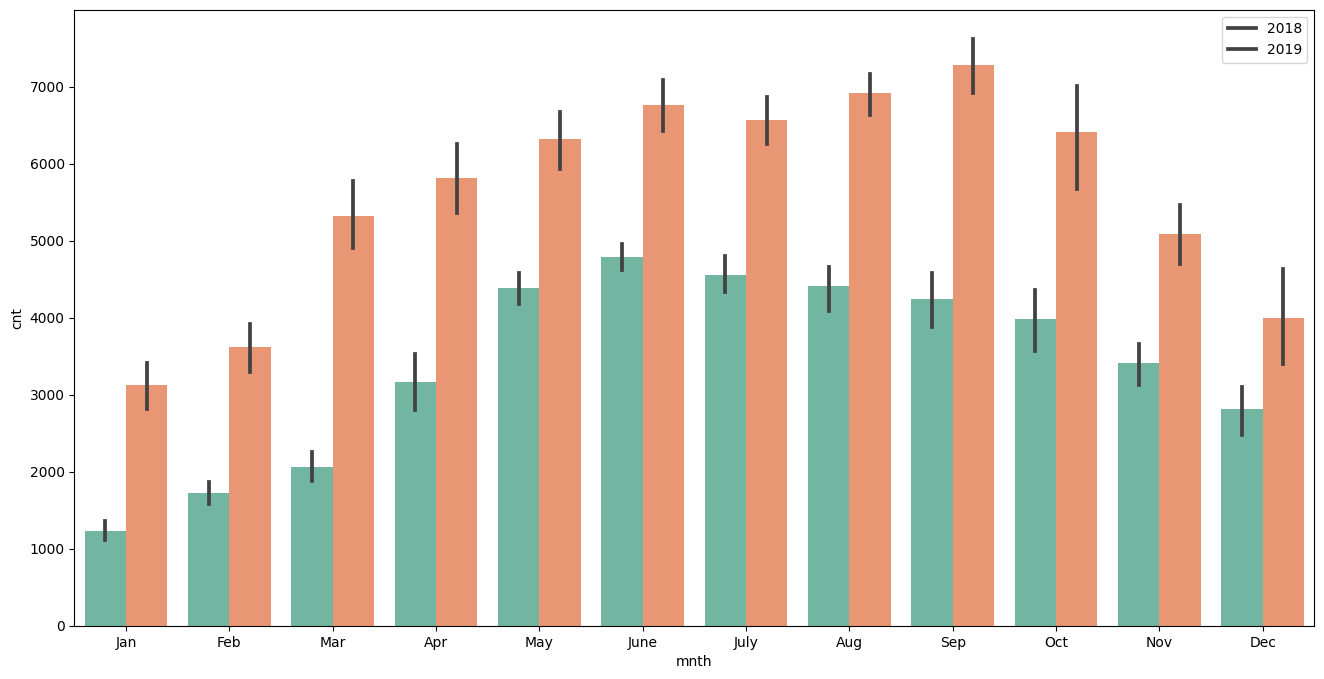

In [223]:
plot_impVariable_bike_data('mnth')

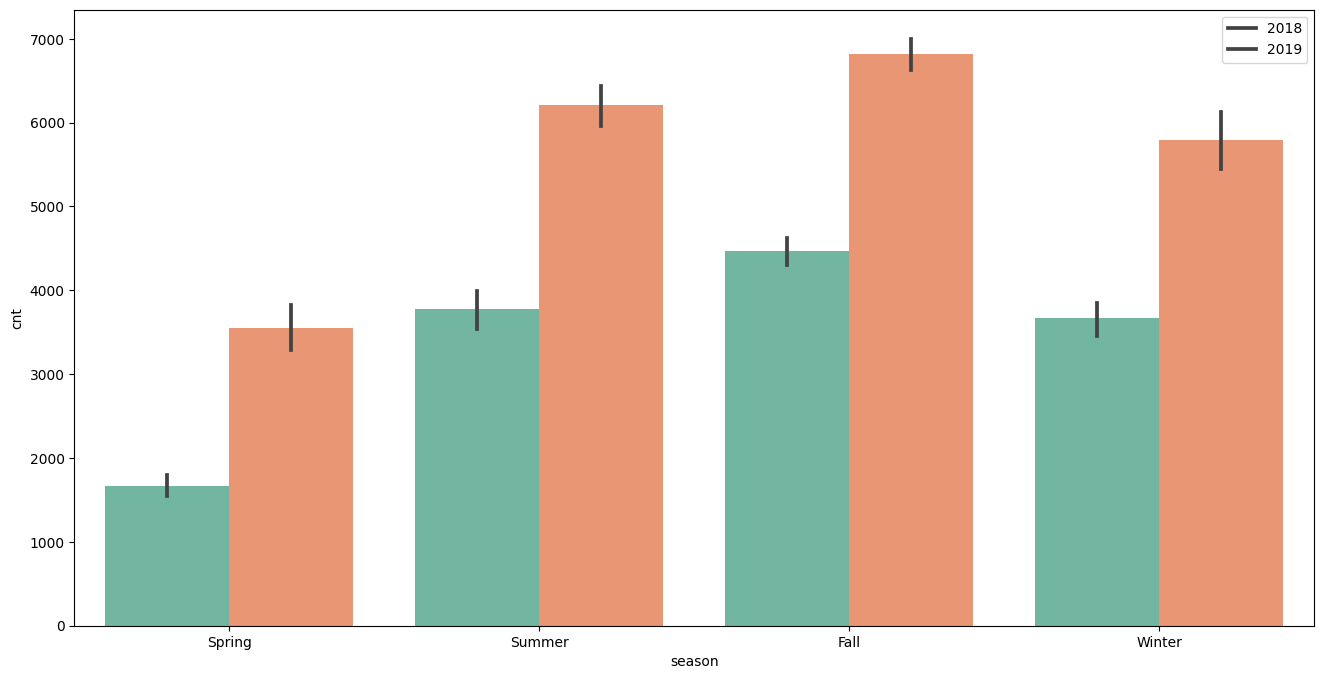

In [224]:
plot_impVariable_bike_data('season')

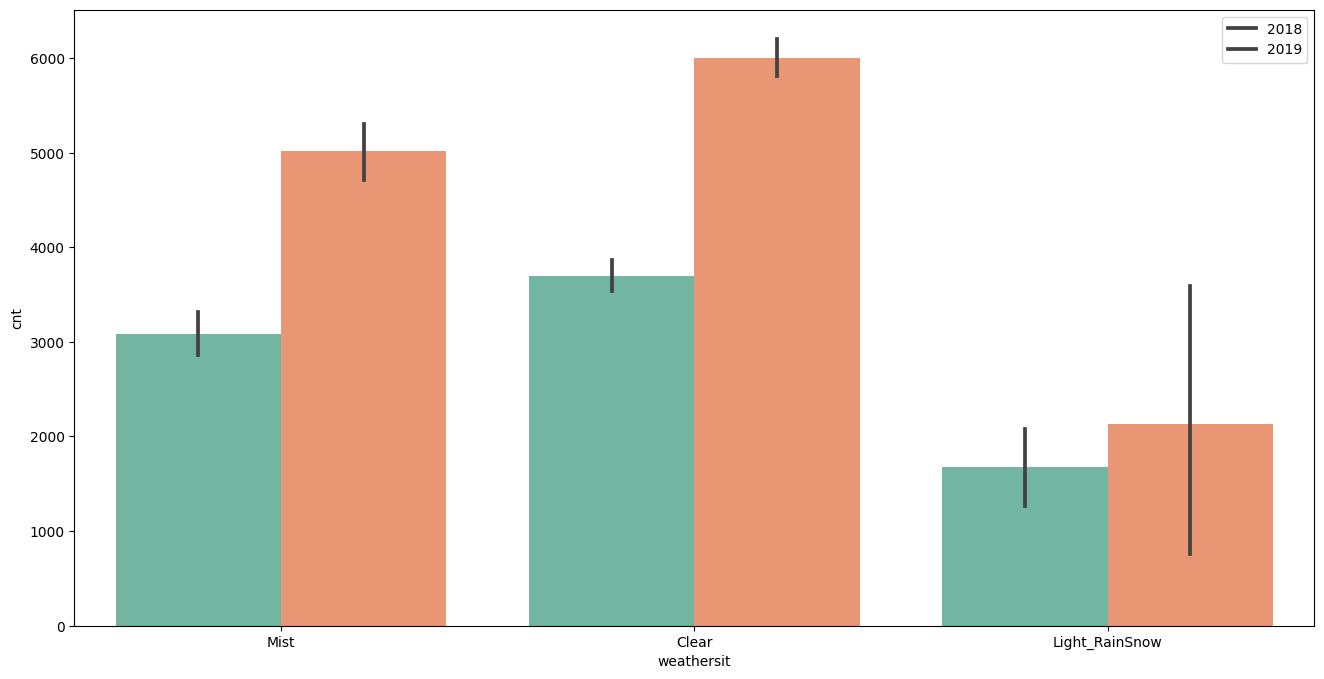

In [225]:
plot_impVariable_bike_data('weathersit')

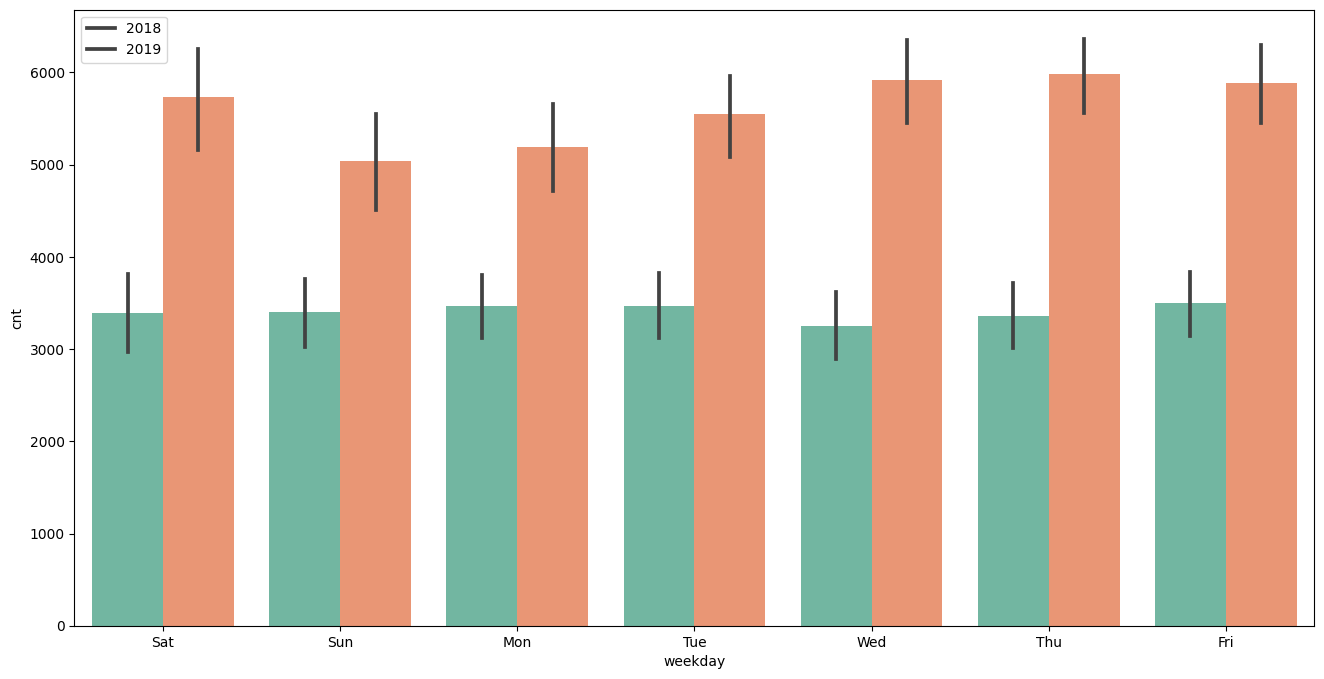

In [226]:
plot_impVariable_bike_data('weekday')

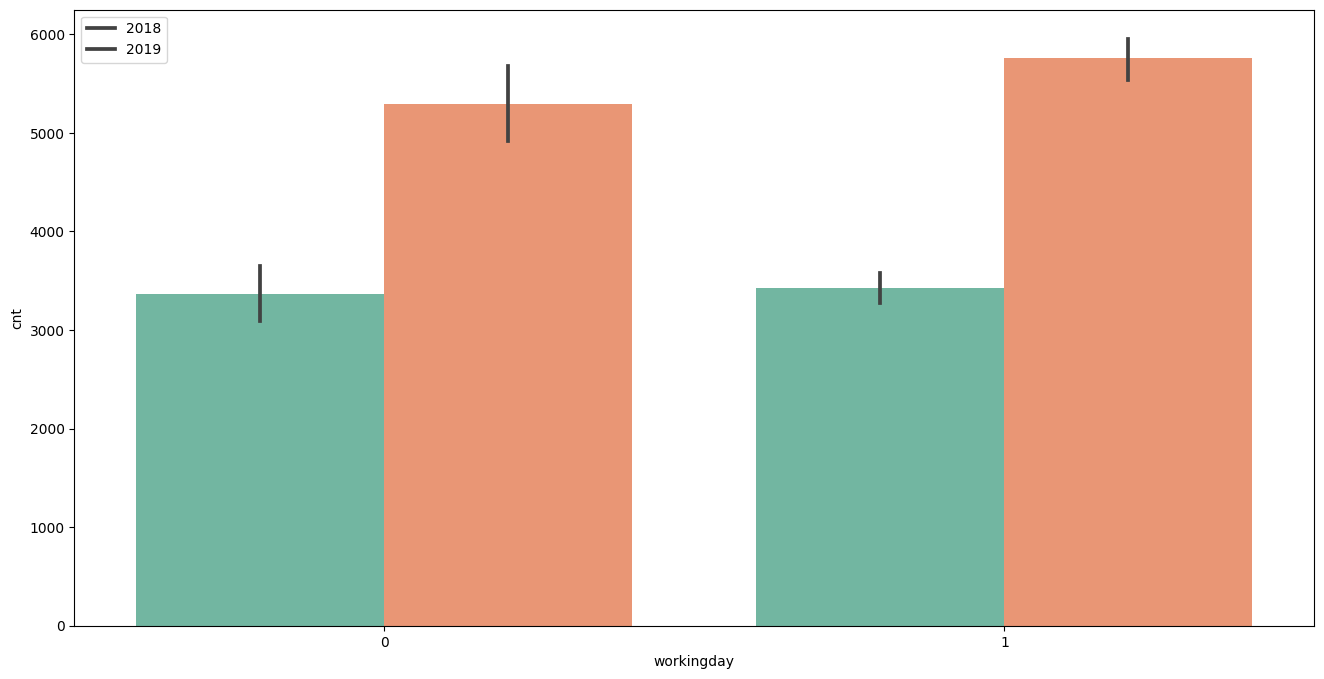

In [227]:
plot_impVariable_bike_data('workingday')

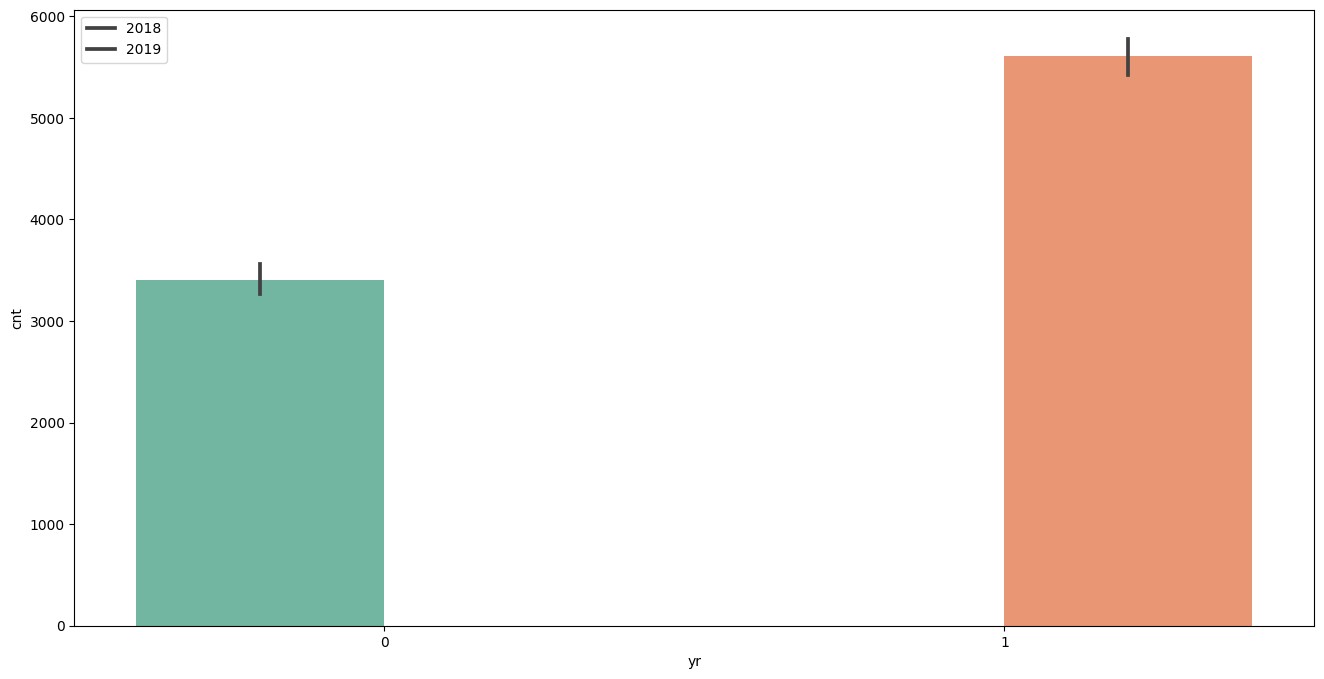

In [228]:
plot_impVariable_bike_data('yr')

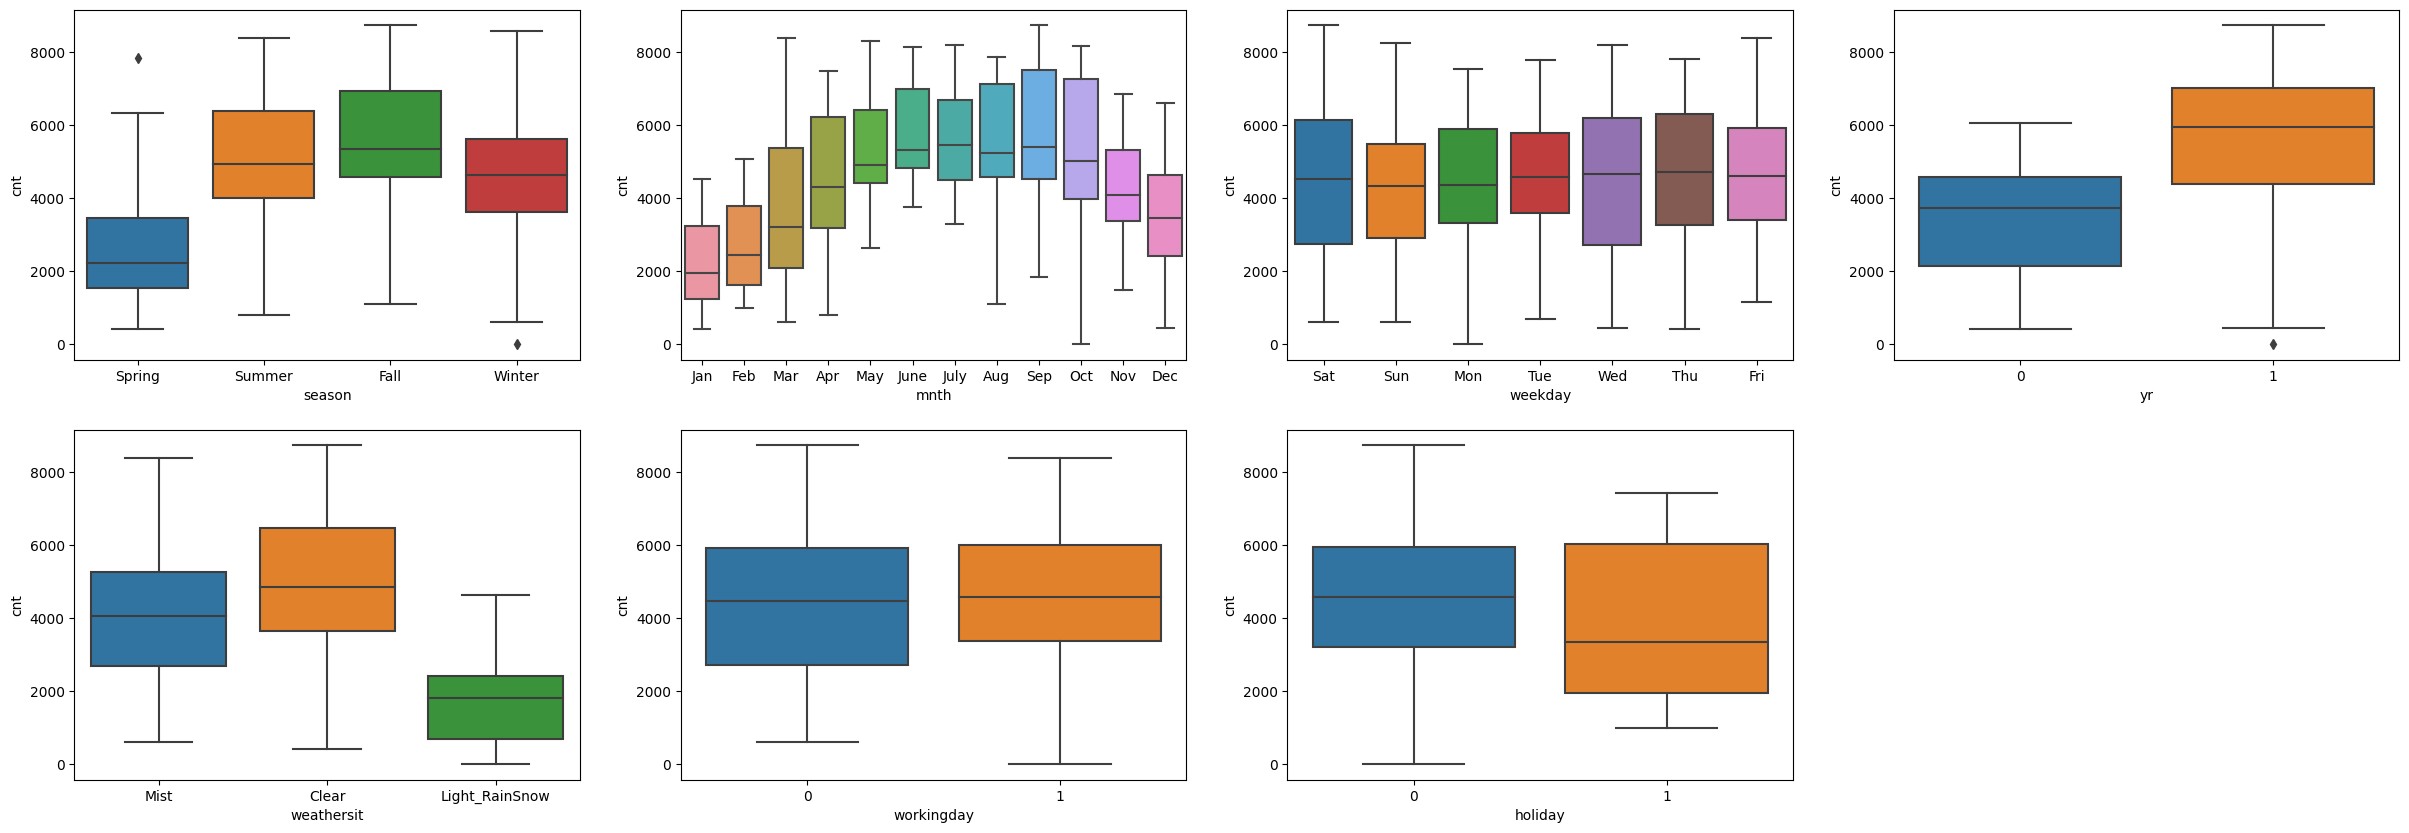

In [229]:
plt.figure(figsize=(30, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,5)

sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data_Modified)
plt.subplot(2,4,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data_Modified)
plt.show()

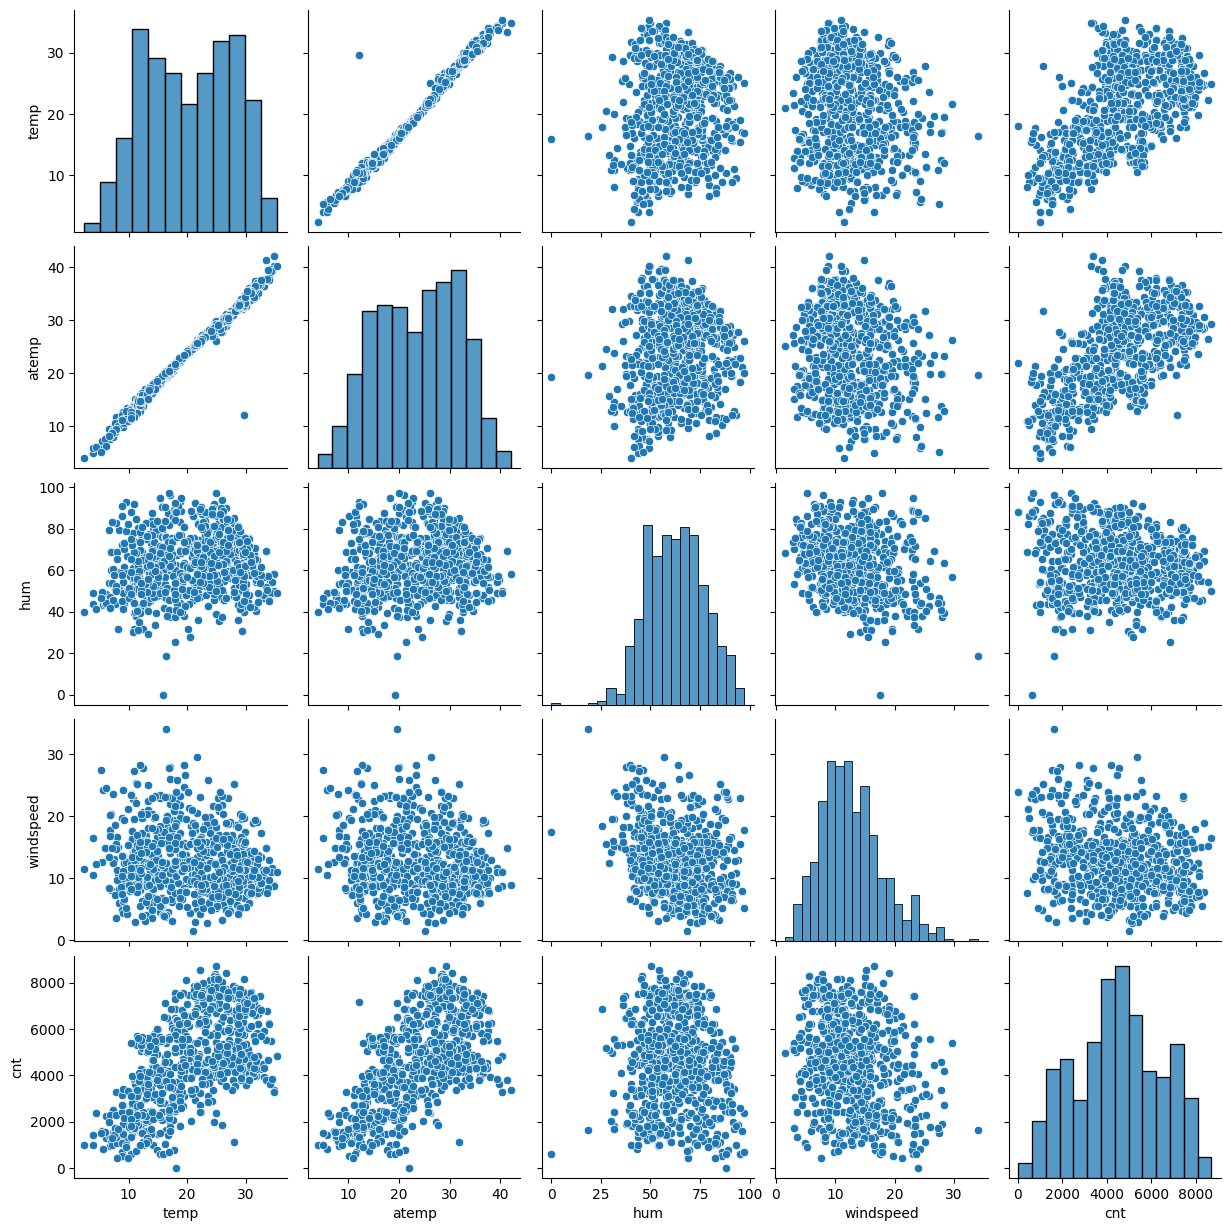

In [230]:
sns.pairplot(data=bike_data_Modified,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Now lets checks for the varibales having numric data

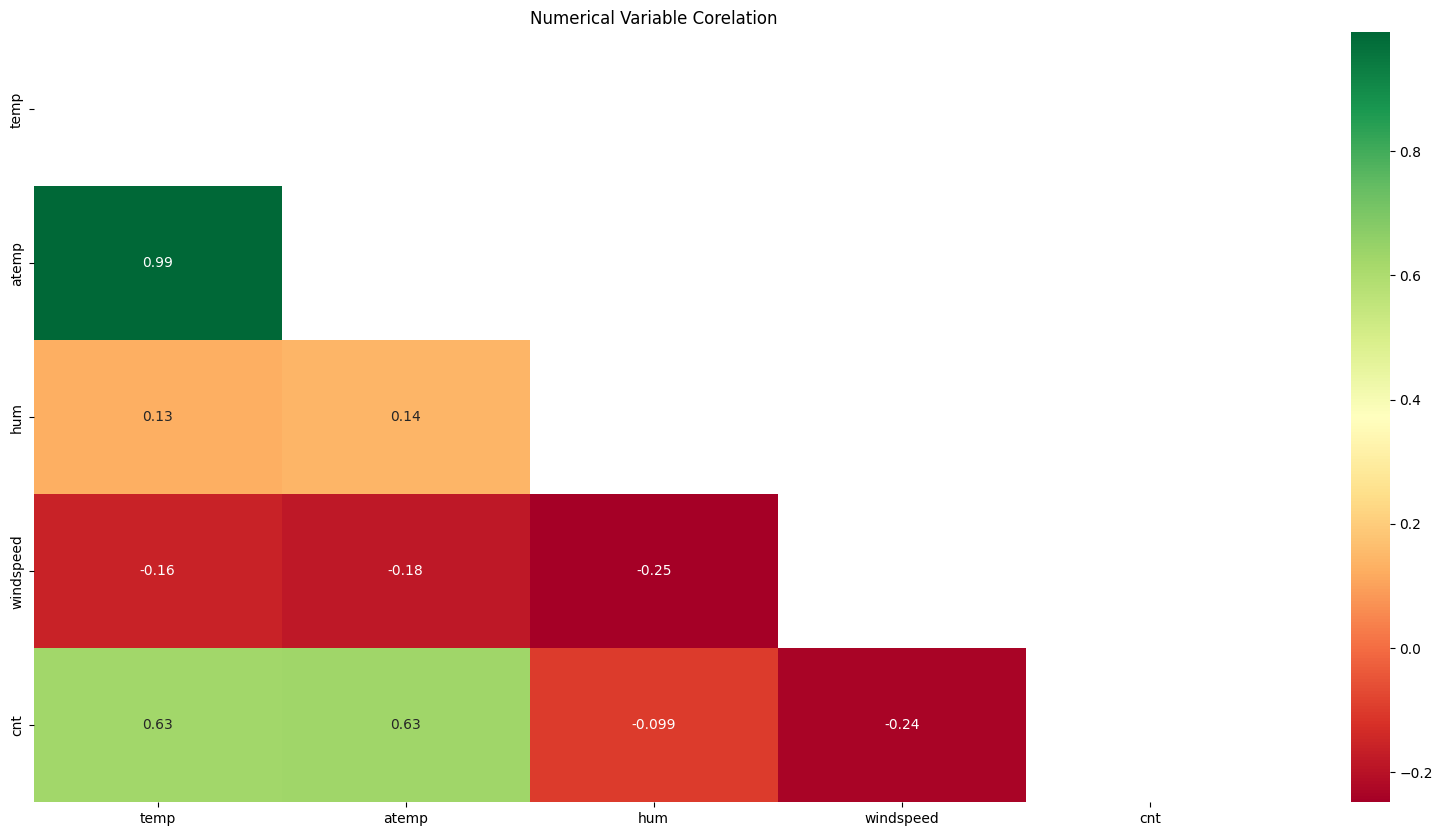

In [231]:
plt.figure(figsize = (20,10))
matrix = np.triu(bike_data_Modified[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bike_data_Modified[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Numerical Variable Corelation")
plt.show()

Dropping atemp since its highly correlated with temp

In [232]:
bike_data_Modified.drop(['atemp'], axis = 1, inplace = True)

Lets standarize the data with the multi value varibales


In [233]:
mnths_d=pd.get_dummies(bike_data_Modified.mnth,drop_first=True)

weekdays_d=pd.get_dummies(bike_data_Modified.weekday,drop_first=True)

weathersit_d=pd.get_dummies(bike_data_Modified.weathersit,drop_first=True)

seasons_d=pd.get_dummies(bike_data_Modified.season,drop_first=True)

In [234]:
bikeData = pd.concat([bike_data_Modified,seasons_d,mnths_d,weekdays_d,weathersit_d],axis=1)

In [235]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   hum             730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  Spring          730 non-null    uint8  
 12  Summer          730 non-null    uint8  
 13  Winter          730 non-null    uint8  
 14  Aug             730 non-null    uint8  
 15  Dec             730 non-null    uint8  
 16  Feb             730 non-null    uint8  
 17  Jan             730 non-null    uin

In [236]:
bikeData.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [237]:
bikeData.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [238]:
bikeData.shape

(730, 29)

# Model Building

Now we have the filtered data available for processing and Model building in "bikeData" varibale.
Lets split the avaiable data into train and test set with train size as .7 (70% train data & 30% test data).Also validate the shape to make sure data is distributed properly as per the size.

In [239]:
np.random.seed(0)
bikeData_train, bikeData_test = train_test_split(bikeData, train_size = 0.7, random_state = 100)

In [240]:
bikeData_train.shape

(510, 29)

In [241]:
bikeData_test.shape

(220, 29)

In [242]:
bikeData_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [243]:
scaler = MinMaxScaler()
numerical_var=['temp','hum','windspeed','cnt']
bikeData_train[numerical_var] = scaler.fit_transform(bikeData_train[numerical_var])

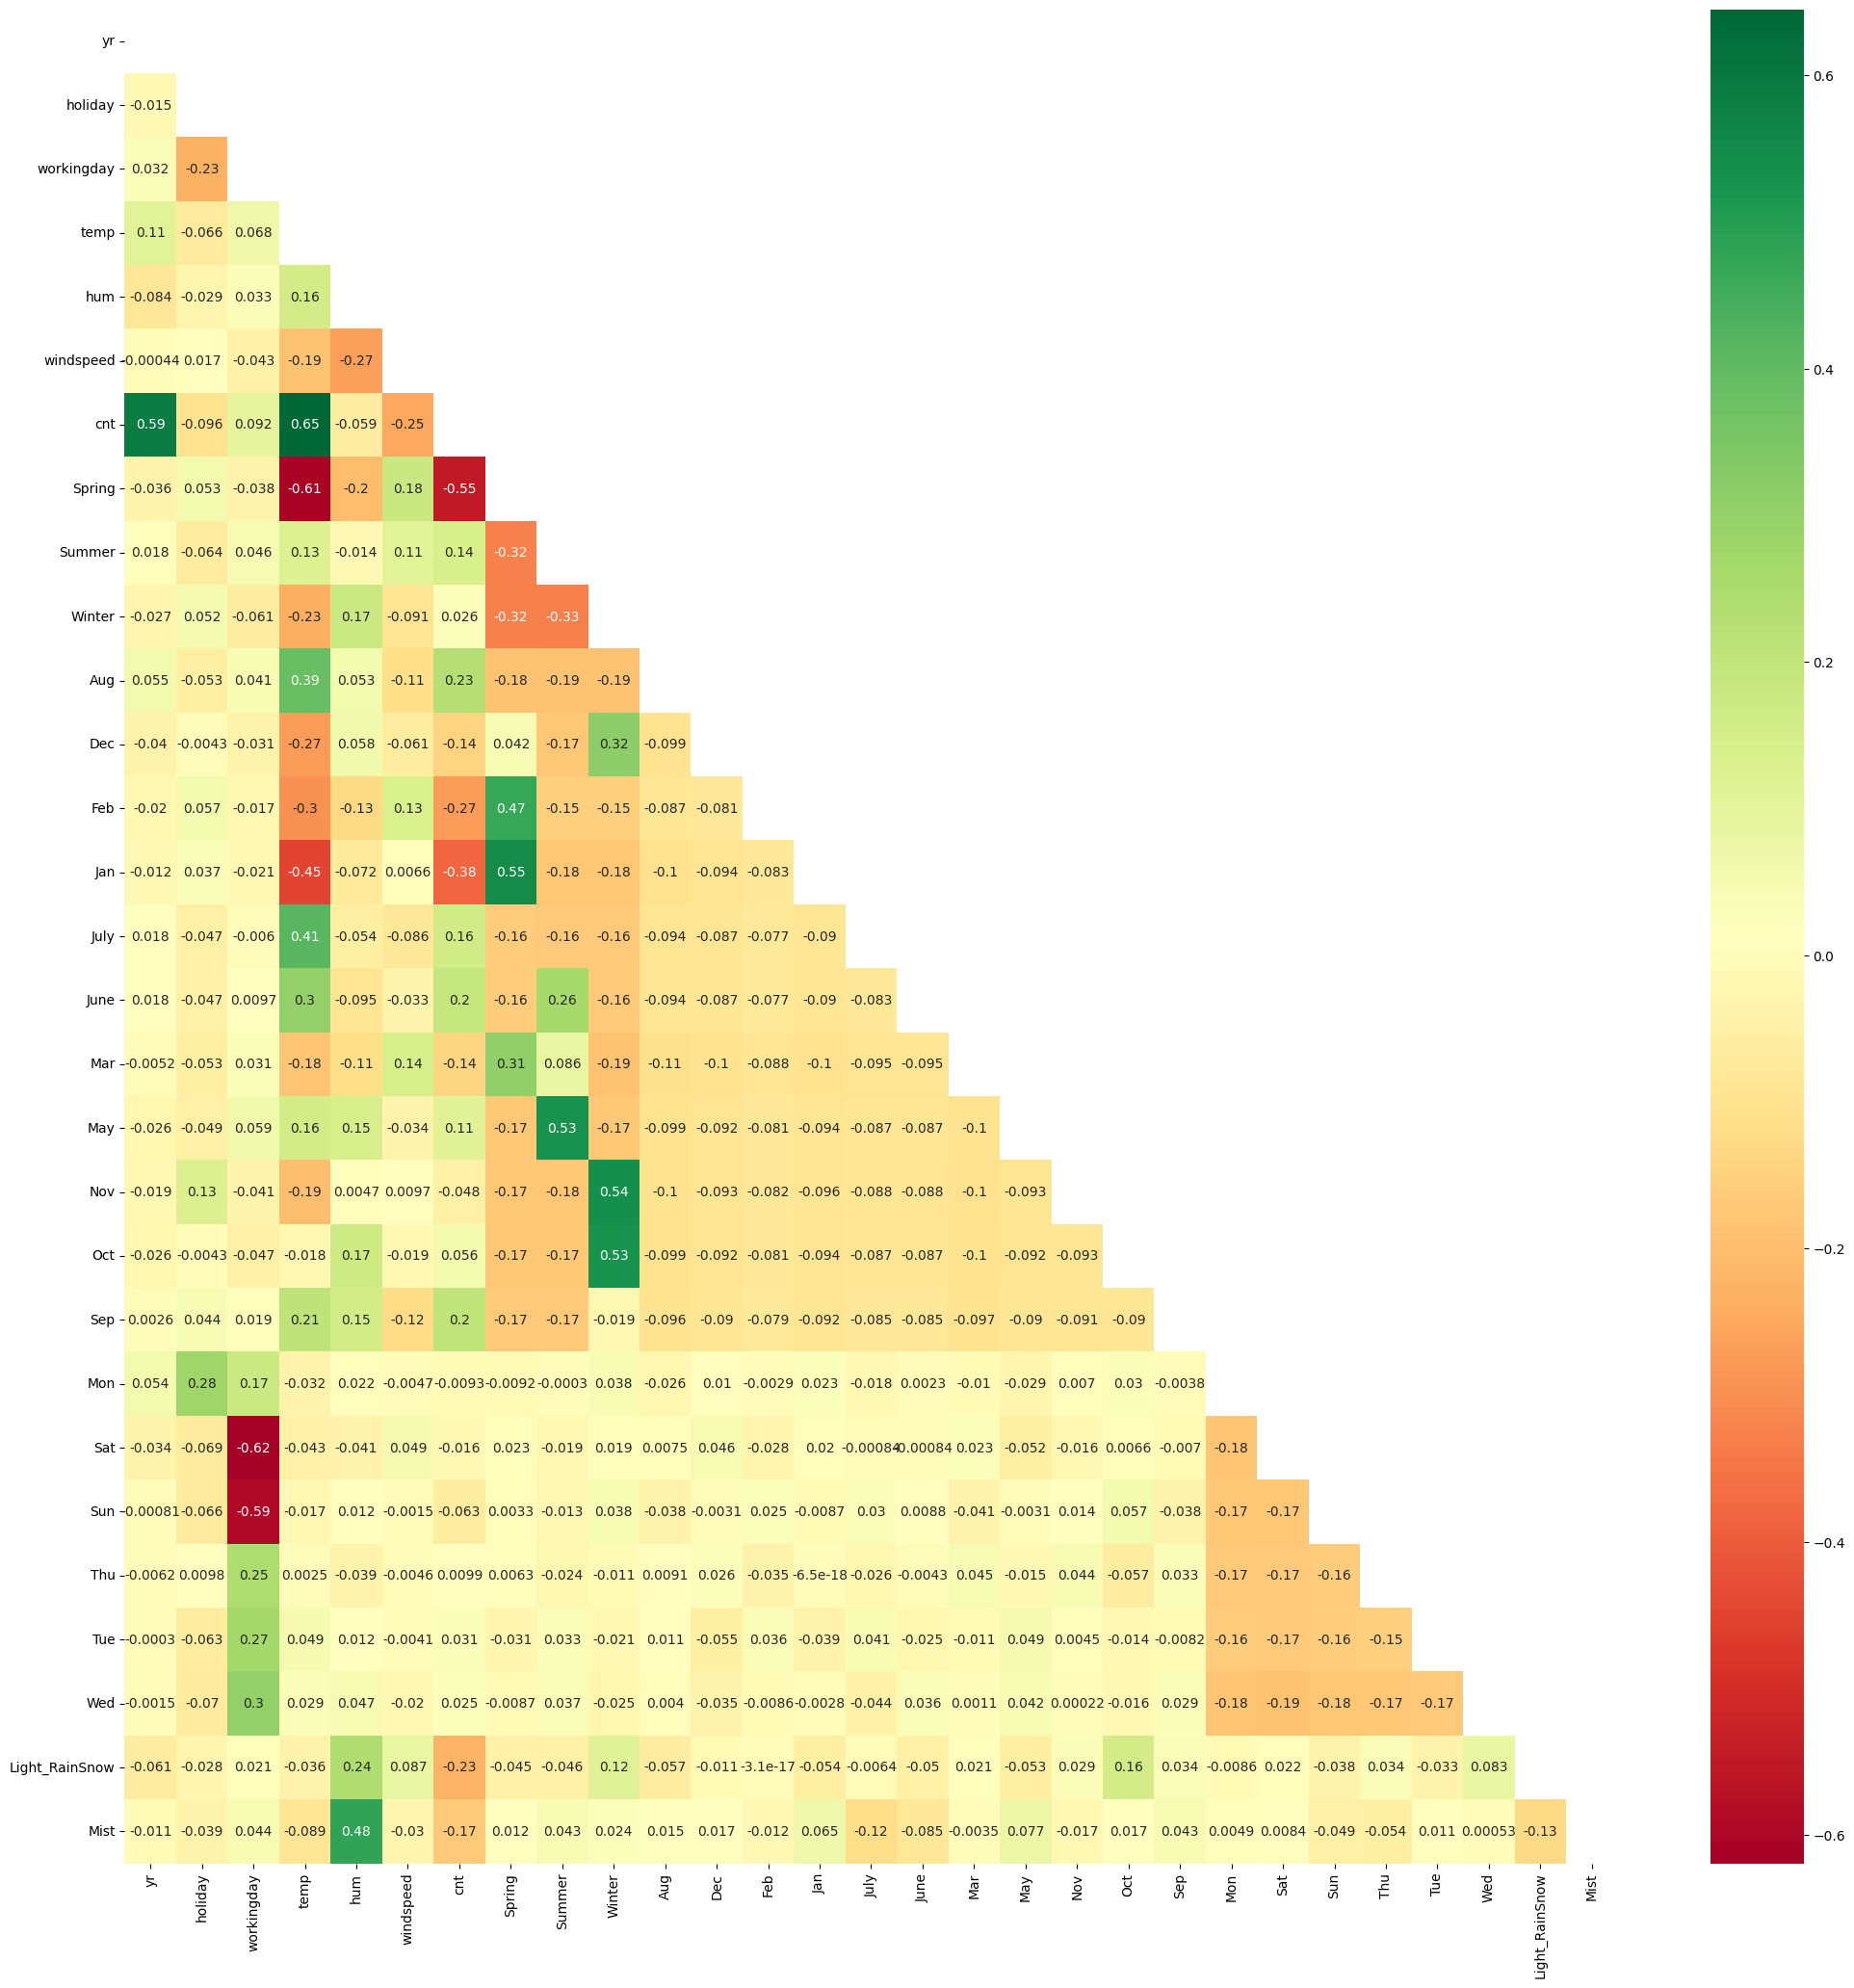

In [244]:
plt.figure(figsize = (25,25))
matrix = np.triu(bikeData_train.corr())
sns.heatmap(bikeData_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Now from the above heatmap we can easily find the corelation. Below are the observations:
1. varibale 'cnt' shows corealtions with Yr and temp.
2. For seasons, we have several corelations:
    a. 'Spring' with 'Feb' and 'Jan'
    b. 'Summer' with 'May'
    c. 'Wintel' with 'Oct' and 'Nov'
3. 'Mist' with 'Humidity'

In [245]:
y_train = bikeData_train.pop('cnt')
X_train = bikeData_train
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [246]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light_RainSnow', True, 1),
 ('Mist', True, 1)]

In [247]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Sun',
       'Light_RainSnow', 'Mist'],
      dtype='object')


In [248]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

In [249]:
X_train_rfe=X_train[col]

In [250]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          4.22e-191
Time:                        19:37:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2093      0.028      7.

In [251]:
# Generic function to calculate VIF of variables


def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [252]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,52.28
12,Sat,12.58
13,Sun,12.11
6,Spring,5.08
3,temp,3.89
8,Winter,3.59
1,holiday,2.97
7,Summer,2.65
4,hum,1.91
9,Jan,1.57


In [253]:
X_train_1 = X_train_rfe.drop(['holiday'], axis = 1)

In [254]:
X_train_lm_2 = sm.add_constant(X_train_1)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          4.22e-191
Time:                        19:37:34   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1937      0.042      4.

In [255]:
calculateVIF(X_train_1)

,Features,VIF
3,hum,32.78
2,temp,19.98
1,workingday,18.57
5,Spring,5.04
11,Sat,4.95
4,windspeed,4.92
12,Sun,4.79
7,Winter,3.74
6,Summer,3.05
14,Mist,2.31


In [256]:
X_train_2 = X_train_1.drop(['hum'], axis = 1)
X_train_lm_3 = sm.add_constant(X_train_2)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.60e-188
Time:                        19:37:41   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1179      0.039      3.

In [257]:
calculateVIF(X_train_2)

,Features,VIF
1,workingday,16.56
2,temp,13.13
3,windspeed,4.79
10,Sat,4.54
11,Sun,4.28
4,Spring,4.22
6,Winter,2.79
5,Summer,2.76
0,yr,2.08
7,Jan,1.65


In [258]:
X_train_3 = X_train_2.drop(['workingday'], axis = 1)
X_train_lm_4 = sm.add_constant(X_train_3)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          2.52e-186
Time:                        19:37:49   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2171      0.030      7.

In [259]:
calculateVIF(X_train_3)

,Features,VIF
1,temp,5.22
2,windspeed,4.64
3,Spring,2.78
4,Summer,2.25
0,yr,2.07
5,Winter,1.82
6,Jan,1.61
7,July,1.60
12,Mist,1.56
8,Sep,1.33


In [260]:
X_train_4 = X_train_3.drop(['Sat'], axis = 1)
X_train_lm_5 = sm.add_constant(X_train_4)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          4.42e-187
Time:                        19:38:01   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2201      0.030      7.

In [261]:
calculateVIF(X_train_4)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
3,Spring,2.76
4,Summer,2.24
0,yr,2.07
5,Winter,1.80
6,Jan,1.61
7,July,1.59
11,Mist,1.56
8,Sep,1.33


In [262]:
X_train_5 = X_train_4.drop(['Jan'], axis = 1)
X_train_lm_6 = sm.add_constant(X_train_5)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          3.37e-187
Time:                        19:38:08   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2034      0.030      6.

In [263]:
calculateVIF(X_train_5)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,Summer,2.23
3,Spring,2.09
0,yr,2.07
5,Winter,1.80
6,July,1.59
10,Mist,1.55
7,Sep,1.33
8,Sun,1.17


In [264]:
X_train_6 = X_train_5.drop(['July'], axis = 1)
X_train_lm_7 = sm.add_constant(X_train_6)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          5.70e-187
Time:                        19:38:15   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1956      0.030      6.

All p values are in acceptable range.

In [265]:
calculateVIF(X_train_6)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,Spring,2.00
4,Summer,1.91
5,Winter,1.64
9,Mist,1.55
6,Sep,1.22
7,Sun,1.17
8,Light_RainSnow,1.08


All VIF values are <5

In [266]:
X_train_lm_7

,const,yr,temp,windspeed,Spring,Summer,Winter,Sep,Sun,Light_RainSnow,Mist
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,1
111,1.0,0,0.345824,0.380981,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,0,1
79,1.0,0,0.462664,0.529881,0,1,0,0,0,0,1


In [267]:
y_train_pred = lr_7.predict(X_train_lm_7)

Lets check for Error terms.
Erro terms are following normal ditribution.

Text(0.5, 0, 'Errors')

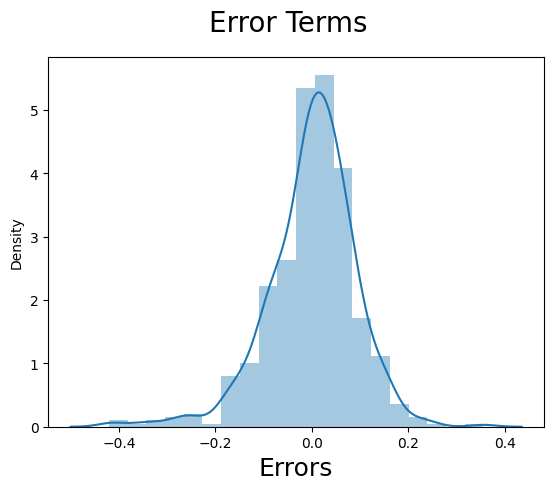

In [268]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [269]:
calculateVIF(X_train_6)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,Spring,2.00
4,Summer,1.91
5,Winter,1.64
9,Mist,1.55
6,Sep,1.22
7,Sun,1.17
8,Light_RainSnow,1.08


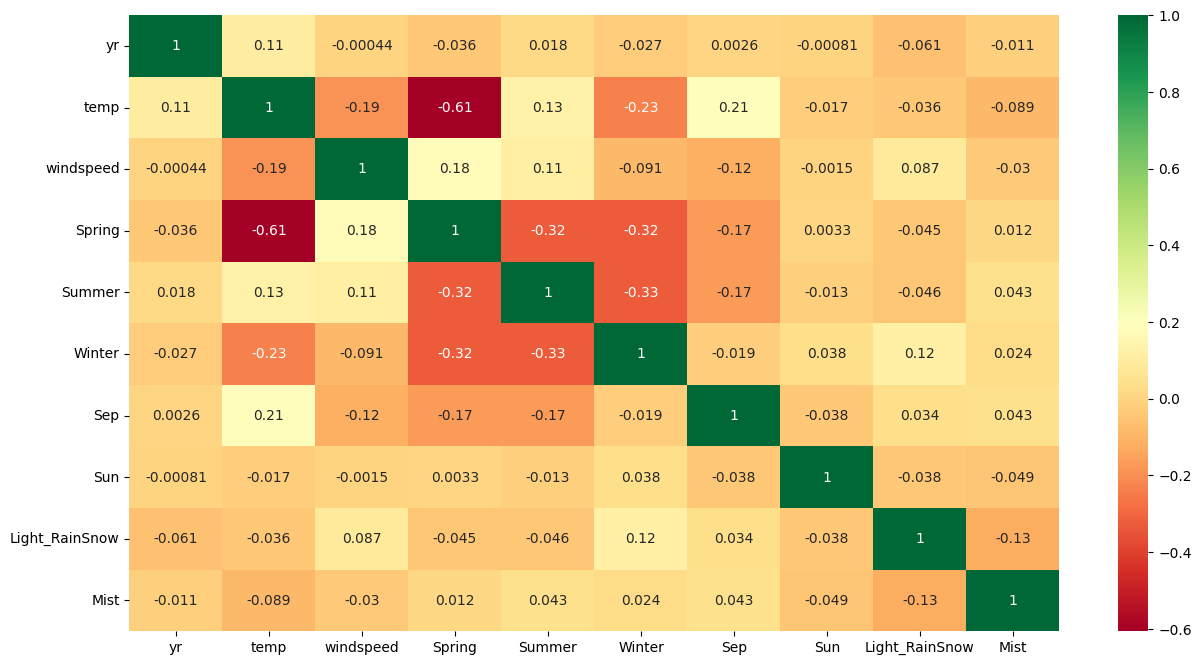

In [270]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_6.corr(),annot = True, cmap="RdYlGn")
plt.show()

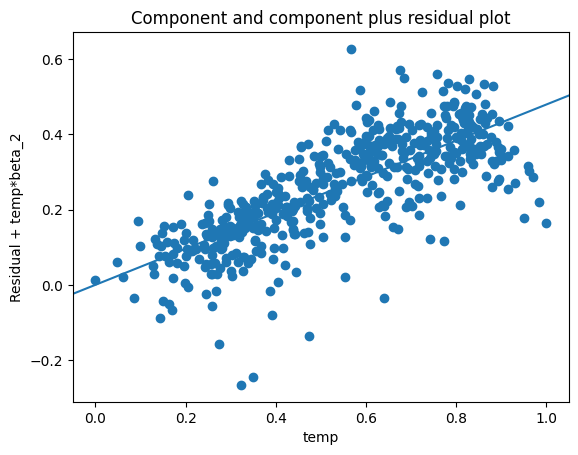

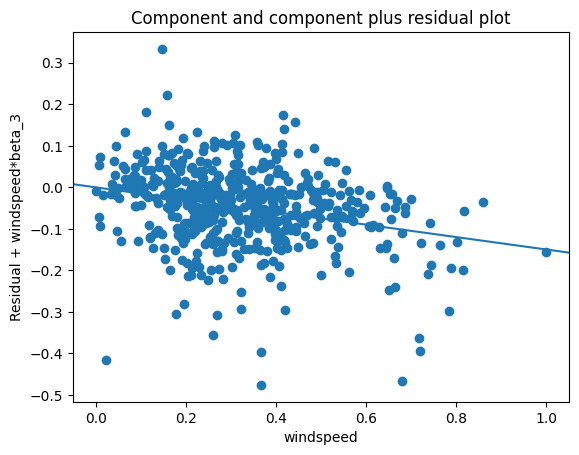

In [271]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_7, 'temp')
plt.show()



sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

# Model Evaluation 

Prediction using Final Model.

In [272]:
numerical_var = ['temp','hum','windspeed','cnt']
bikeData_test[numerical_var] = scaler.transform(bikeData_test[numerical_var])
bikeData_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_RainSnow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [273]:
y_test = bikeData_test.pop('cnt')
x_test = bikeData_test

col_rfe = X_train_6.columns

x_test = x_test[col_rfe]


x_test_lm = sm.add_constant(x_test)

In [274]:
x_test.head()

,yr,temp,windspeed,Spring,Summer,Winter,Sep,Sun,Light_RainSnow,Mist
184,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0


In [275]:
y_pred = lr_7.predict(x_test_lm)

Calculate R^2 value

In [276]:
r2_score(y_test, y_pred)


0.803190810381663

plot of predicted value Vs actual value

Text(0, 0.5, 'y_pred')

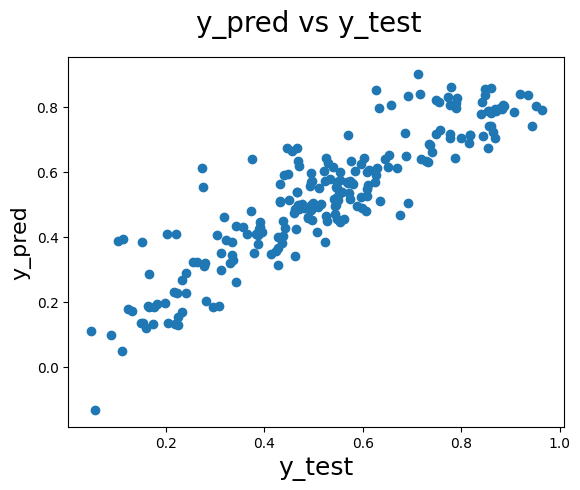

In [280]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_pred vs y_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

As per above model,the demand of bikes depends on below parameters.

In [278]:
round(lr_7.params,4)

const             0.1956
yr                0.2344
temp              0.4795
windspeed        -0.1498
Spring           -0.0572
Summer            0.0623
Winter            0.0937
Sep               0.0854
Sun              -0.0461
Light_RainSnow   -0.2856
Mist             -0.0790
dtype: float64

Visualization of Regression plot on test data

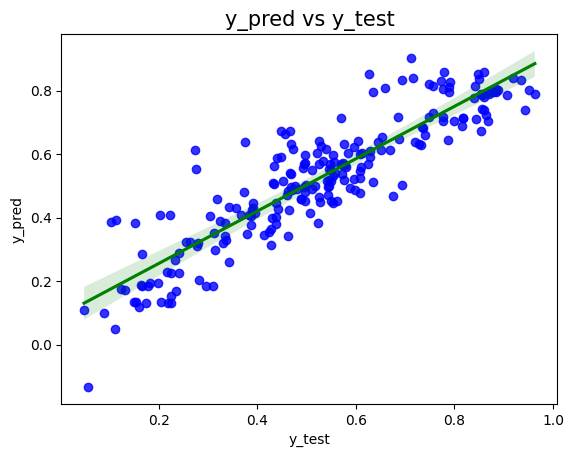

In [279]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=100, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
plt.title('y_pred vs y_test', fontsize=15)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()